<a href="https://colab.research.google.com/github/AsadNazir/ML-Semester-Project/blob/main/NaiveBayesClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries


In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns

# Getting the Dataset from Drive

In [61]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [62]:
path='/content/drive/MyDrive/updated_water_potability.csv'
dataSet= pd.read_csv(path)
dataSet.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,7.080795,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


Creating a histogram of our class label

<Axes: >

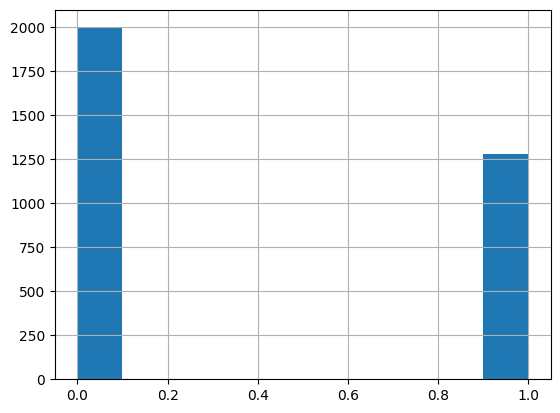

In [63]:
dataSet["Potability"].hist()

# Checking for coorelation between out features

This is done by using heatmaps to visualize. Pink means highly co related and blue means not correlated

<Axes: >

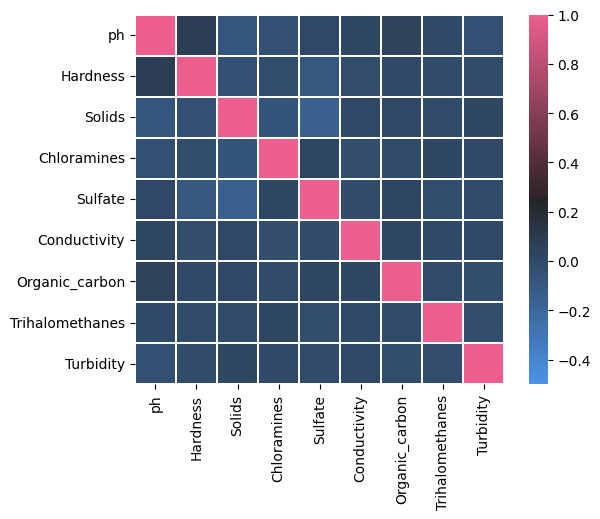

In [64]:
Corr = dataSet.iloc[:,:-1].corr(method="pearson")
cmap= sns.diverging_palette(250,354,80,60,center="dark",as_cmap=True)
sns.heatmap(Corr,vmax=1,vmin=-0.5,square=True,cmap=cmap, linewidths=0.2)

<Axes: xlabel='Turbidity', ylabel='Count'>

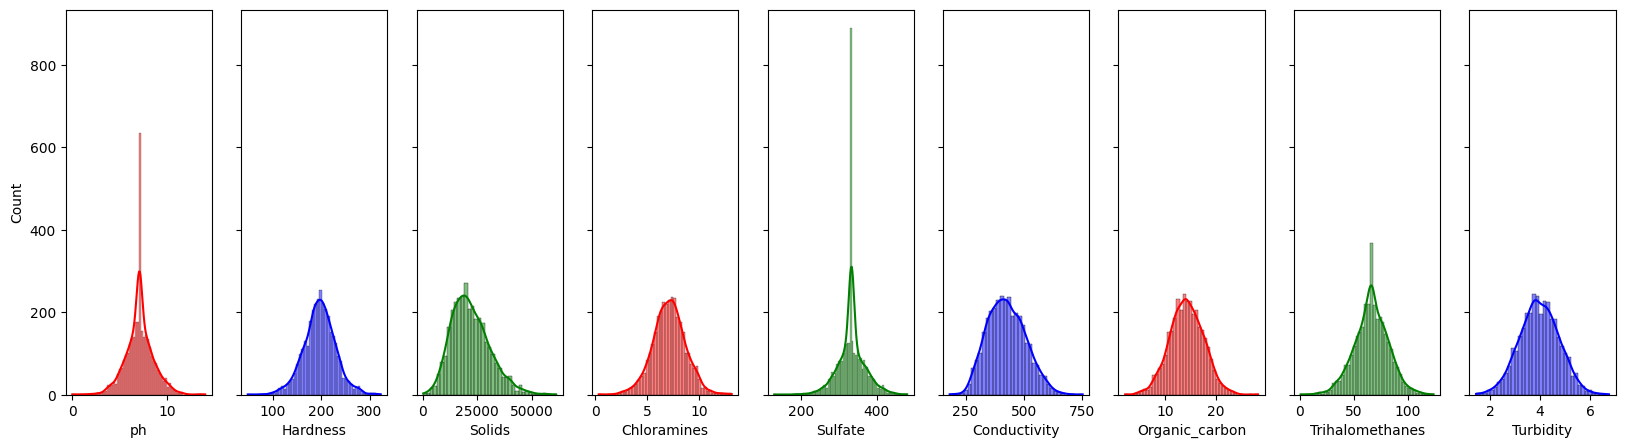

In [59]:
fig , axes = plt.subplots(1,9,figsize=(20,5), sharey=True)
sns.histplot(dataSet,ax=axes[0],x="ph",kde=True,color="r")
sns.histplot(dataSet,ax=axes[1],x="Hardness",kde=True,color="b")
sns.histplot(dataSet,ax=axes[2],x="Solids",kde=True,color="g")
sns.histplot(dataSet,ax=axes[3],x="Chloramines",kde=True,color="r")
sns.histplot(dataSet,ax=axes[4],x="Sulfate",kde=True,color="g")
sns.histplot(dataSet,ax=axes[5],x="Conductivity",kde=True,color="b")
sns.histplot(dataSet,ax=axes[6],x="Organic_carbon",kde=True,color="r")
sns.histplot(dataSet,ax=axes[7],x="Trihalomethanes",kde=True,color="g")
sns.histplot(dataSet,ax=axes[8],x="Turbidity",kde=True,color="b")

# Test set and Training set

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

X=dataSet.drop("Potability", axis=1)
Y=dataSet["Potability"]

X_train,X_test,y_train,y_test= train_test_split(X,Y,test_size=0.20,random_state=42)

In [66]:
# Create a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the classifier
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6310975609756098


# Decision Tree Classifier

In [67]:
from sklearn.tree import DecisionTreeClassifier

In [68]:
# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Train the classifier
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Calculate the accuracy of the classifier
accuracy2 = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy2)

Accuracy: 0.5929878048780488


# KNN Classifiier

In [69]:
from sklearn.neighbors import KNeighborsClassifier

In [70]:
# Create a KNeighbors classifier
knn_classifier = KNeighborsClassifier()

# Train the classifier
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_classifier.predict(X_test)

# Calculate the accuracy of the classifier
accuracy3 = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy3)

Accuracy: 0.5411585365853658


# SVM Classifier

In [71]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [73]:
# Preprocess numerical features using StandardScaler
numerical_features = X.select_dtypes(include=['float', 'int']).columns.tolist()
preprocessor = StandardScaler()

X_train[numerical_features] = preprocessor.fit_transform(X_train[numerical_features])
X_test[numerical_features] = preprocessor.transform(X_test[numerical_features])

# Create a Linear SVM classifier
svm_classifier = LinearSVC(max_iter=4000)

# Train the classifier
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Calculate the accuracy of the classifier
accuracy4 = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy4)

Accuracy: 0.6280487804878049
